In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy.stats import probplot,shapiro
import os

In [2]:
chain_lengths=[25,50,75,100,125,150]
folders=[]
for i in chain_lengths:
    folders.append('../chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    if j==0:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=chain_rg_ree.copy()
    else:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=running_df.append(chain_rg_ree.copy())
    j+=1  

#     epas_considered = chain_rg_ree.epas.unique()
#     blank_df = pd.DataFrame()
#     for epas in chain_rg_ree.epas.unique():
#         if epas in epas_considered:
#             frames_number=len(chain_rg_ree[chain_rg_ree.epas==epas].index)
#             equil_frames=int(0.90*frames_number)
#             temp_df = chain_rg_ree[chain_rg_ree.epas==epas].iloc[-equil_frames:,:]
#             blank_df = blank_df.append(temp_df)
#     equil_chain_rg_ree=blank_df.copy()



# set epas for notebook

In [3]:
chain_rg_ree=running_df[running_df.epas==0.6]

# continue

In [4]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [5]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [6]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

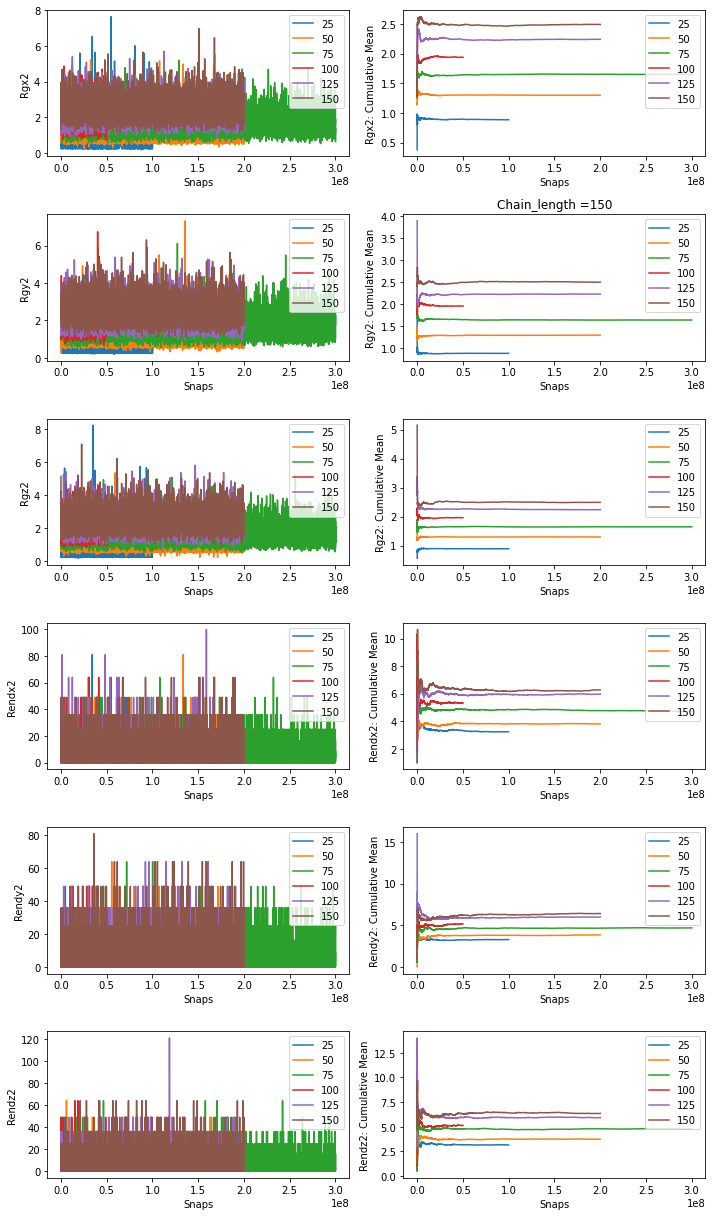

In [7]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))

for chain_length in chain_rg_ree.chain_length.unique():
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,label=str(chain_length))
    
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')

    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,label=str(chain_length))

    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()    
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()    
    ax[1,1].set_title('Chain_length ='+str(chain_length))

    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,label=str(chain_length))
 
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()    
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
   
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,label=str(chain_length))
 
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()    
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
 
    ax[3,1].legend()

    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,label=str(chain_length))
 
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()    
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
 
    ax[4,1].legend()

    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,label=str(chain_length))
 
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()    
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')

    ax[5,1].legend()    
plt.tight_layout()

In [8]:
chain_rg_ree

,frames,epas,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
90090,10000,0.6,25,-104.4,0.377600,1.750400,0.560000,1.0,9.0,4.0,14.0,2.688000,5.208333,-0.777600,1.190400,0.480394
90091,20000,0.6,25,-292.8,1.209600,0.726400,0.640000,9.0,1.0,0.0,10.0,2.576000,3.881988,0.526400,0.086400,0.206402
90092,30000,0.6,25,-495.6,0.633600,0.720000,0.678400,0.0,1.0,1.0,2.0,2.032000,0.984252,-0.065600,0.041600,0.036832
90093,40000,0.6,25,-709.2,1.622400,1.110400,0.585600,16.0,0.0,0.0,16.0,3.318400,4.821601,0.774400,0.524800,0.270588
90094,50000,0.6,25,-876.0,0.729600,0.857600,0.982400,4.0,4.0,0.0,8.0,2.569600,3.113325,-0.190400,-0.124800,0.085203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100095,200120000,0.6,150,136.8,2.250000,2.168889,2.778489,1.0,4.0,4.0,9.0,7.197378,1.250455,-0.223689,-0.609600,0.079663
100096,200140000,0.6,150,136.8,2.138489,2.534933,3.415156,1.0,1.0,1.0,3.0,8.088578,0.370893,-0.836556,-0.880222,0.139923
100097,200160000,0.6,150,141.6,2.286933,2.073289,2.808889,4.0,1.0,36.0,41.0,7.169111,5.718980,-0.154156,-0.735600,0.091425
100098,200180000,0.6,150,152.4,2.124267,2.260267,3.246622,1.0,1.0,1.0,3.0,7.631156,0.393125,-0.629178,-0.986356,0.139024


In [9]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = chain_lengths
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.90*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

In [10]:
equil_chain_rg_ree

,frames,epas,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
91091,10020000,0.6,25,-188870.4,0.697600,0.960000,0.518400,1.0,0.0,1.0,2.0,2.176000,0.919118,-0.041600,0.441600,0.176789
91092,10030000,0.6,25,-189063.6,0.534400,0.800000,1.366400,1.0,4.0,9.0,14.0,2.700800,5.183649,-0.548800,-0.566400,0.272535
91093,10040000,0.6,25,-189259.2,0.758400,0.880000,0.726400,4.0,4.0,4.0,12.0,2.364800,5.074425,-0.044800,0.153600,0.059355
91094,10050000,0.6,25,-189472.8,1.120000,0.726400,0.601600,1.0,1.0,4.0,6.0,2.448000,2.450980,0.456000,0.124800,0.191435
91095,10060000,0.6,25,-189717.6,2.080000,0.710400,1.350400,16.0,1.0,9.0,26.0,4.140800,6.278980,1.049600,-0.640000,0.286649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100095,200120000,0.6,150,136.8,2.250000,2.168889,2.778489,1.0,4.0,4.0,9.0,7.197378,1.250455,-0.223689,-0.609600,0.079663
100096,200140000,0.6,150,136.8,2.138489,2.534933,3.415156,1.0,1.0,1.0,3.0,8.088578,0.370893,-0.836556,-0.880222,0.139923
100097,200160000,0.6,150,141.6,2.286933,2.073289,2.808889,4.0,1.0,36.0,41.0,7.169111,5.718980,-0.154156,-0.735600,0.091425
100098,200180000,0.6,150,152.4,2.124267,2.260267,3.246622,1.0,1.0,1.0,3.0,7.631156,0.393125,-0.629178,-0.986356,0.139024


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


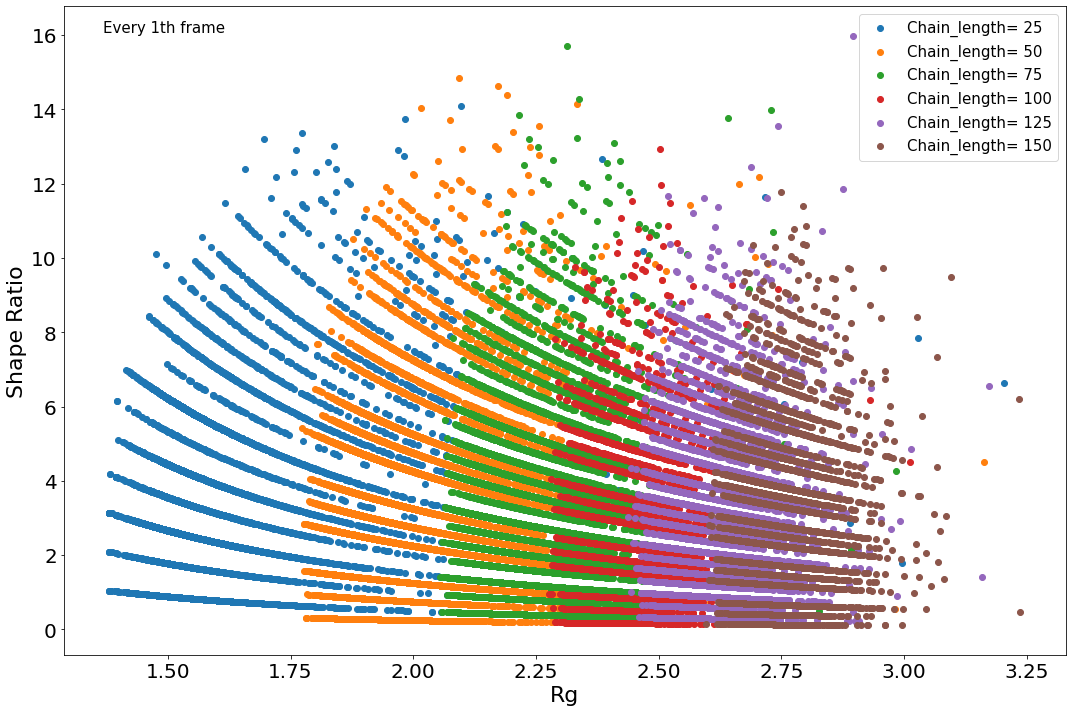

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


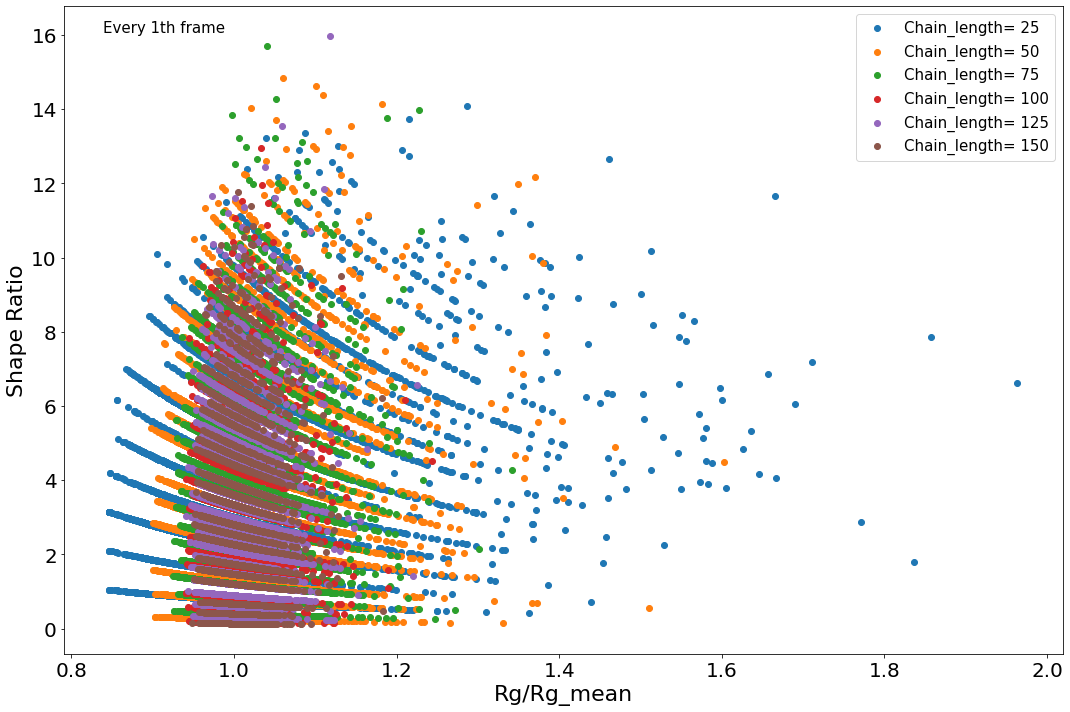

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


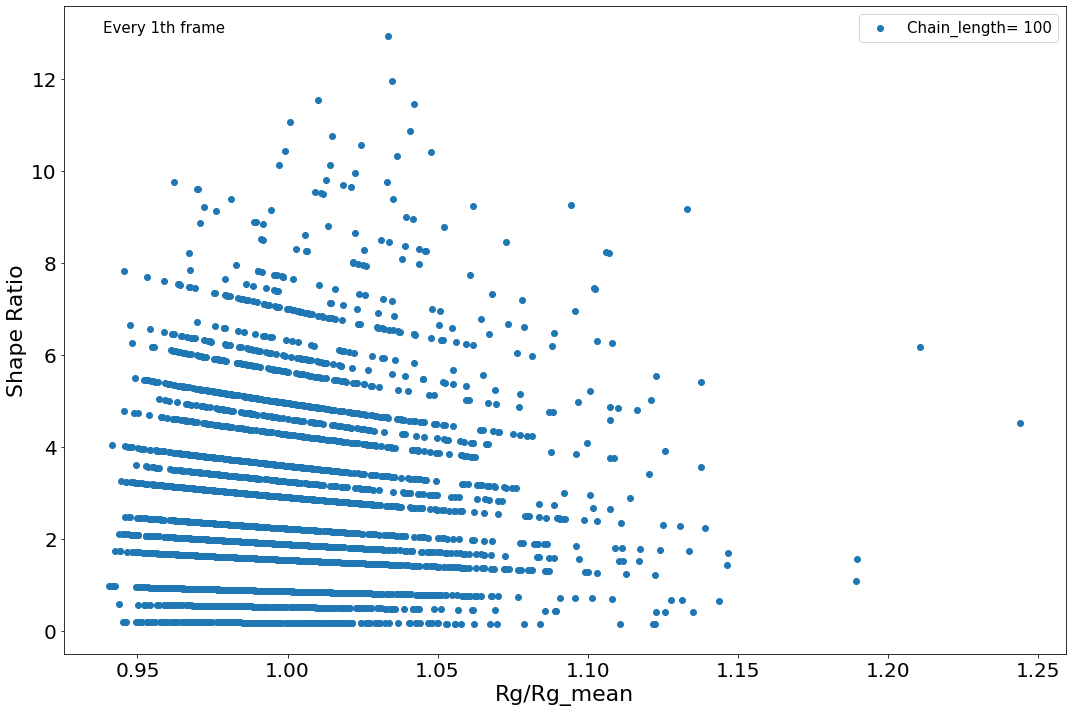

In [13]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    if i==100:
        ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
                   equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
                label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


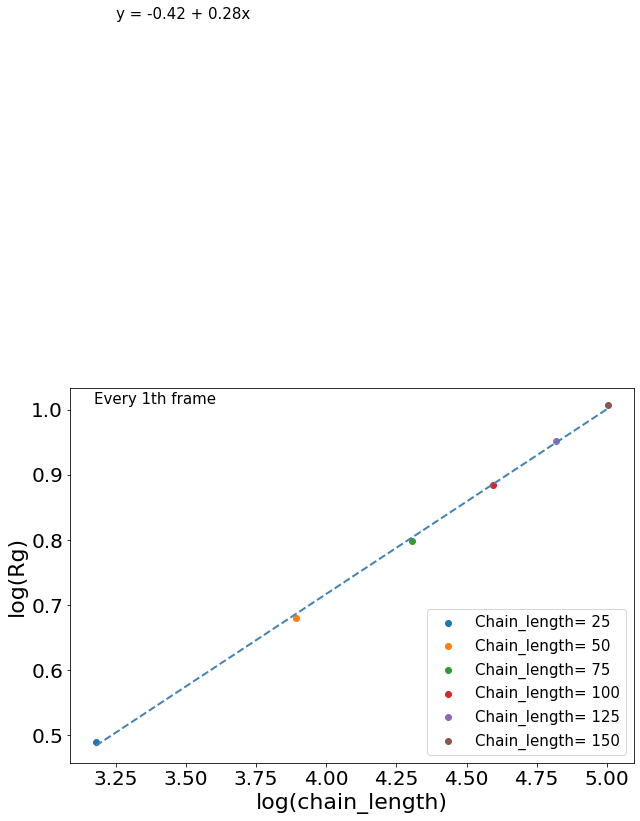

In [14]:
#use i-1 because there are i-1 bonds
fig,ax = plt.subplots(figsize=(9,25))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(np.log(i-1),np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5),
            label='Chain_length= '+str(i))
ax.legend(fontsize=15,loc='lower right')
ax.set_xlabel('log(chain_length)',fontsize=22)
ax.set_ylabel('log(Rg)',fontsize=22)
x=np.array([np.log(i-1) for i in equil_chain_rg_ree.chain_length.unique()])
y=np.array([np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5) for i in equil_chain_rg_ree.chain_length.unique()])
a, b = np.polyfit(x, y, 1)
ax.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
ax.text(0.15,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
ax.text(3.25, 1.6, 'y = ' + '{:.02f}'.format(b) + ' + {:.02f}'.format(a) + 'x', size=14,fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


In [15]:
equil_chain_rg_ree.ratio.mean

<bound method Series.mean of 91091     0.919118
91092     5.183649
91093     5.074425
91094     2.450980
91095     6.278980
            ...   
100095    1.250455
100096    0.370893
100097    5.718980
100098    0.393125
100099    1.208631
Name: ratio, Length: 67554, dtype: float64>

In [16]:
np.log(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==25].Rg2.values.mean())

0.9784565435918074

mean=  0.26049765301635286 for run =  25 std=  0.1331743239396923 error =  0.0014030792673386547
mean=  0.20550974599797855 for run =  50 std=  0.10786557958409798 error =  0.0008037816409765099
mean=  0.17852853394075793 for run =  75 std=  0.09105319612298665 error =  0.0006785008496508346
mean=  0.16309111746901933 for run =  100 std=  0.08472028864810027 error =  0.0012616744523585243
mean=  0.15009752244102206 for run =  125 std=  0.0778483779217339 error =  0.0008201839650966991
mean=  0.14188878345726444 for run =  150 std=  0.07417681200024508 error =  0.0007815015984759311


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


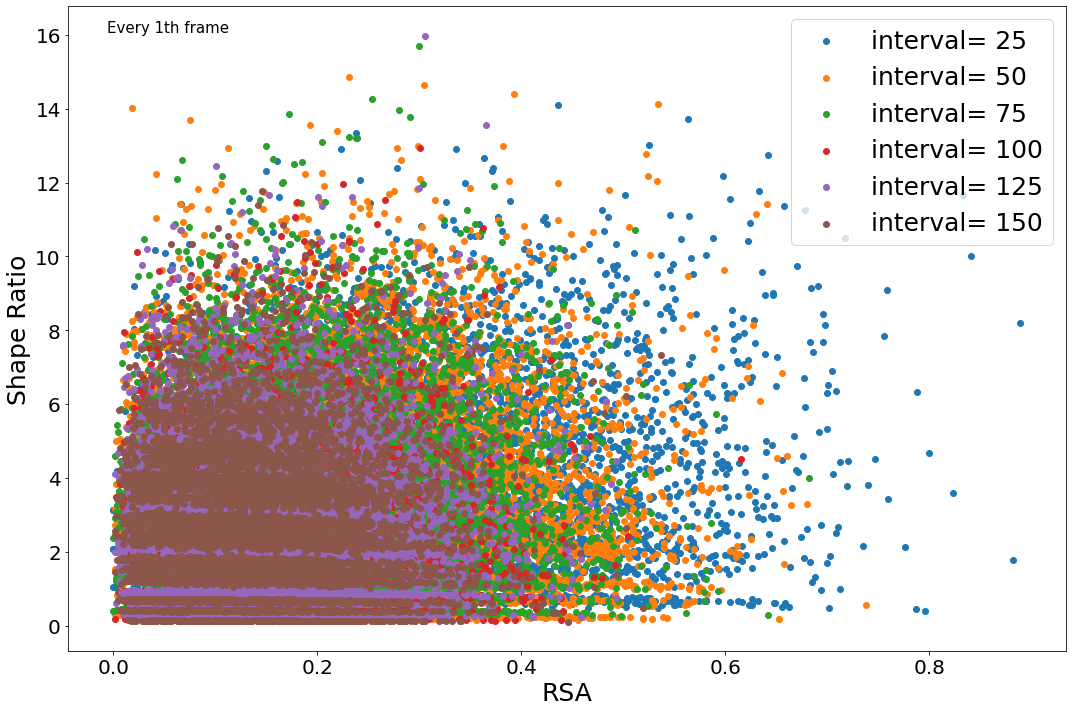

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


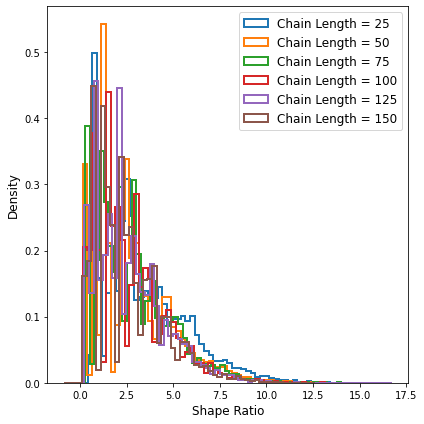

In [18]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.max()+1,0.25),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [19]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean shape ratio for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.std(),'0.2f'))
    

The mean shape ratio for chain length  25  is 3.51 with standard deviation  2.24
The mean shape ratio for chain length  50  is 2.89 with standard deviation  2.08
The mean shape ratio for chain length  75  is 2.85 with standard deviation  1.96
The mean shape ratio for chain length  100  is 2.66 with standard deviation  1.89
The mean shape ratio for chain length  125  is 2.66 with standard deviation  1.83
The mean shape ratio for chain length  150  is 2.55 with standard deviation  1.80


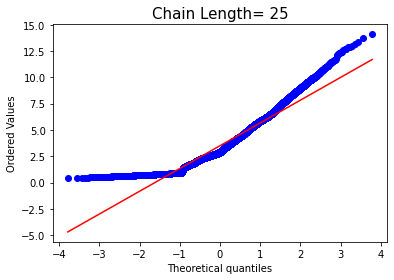

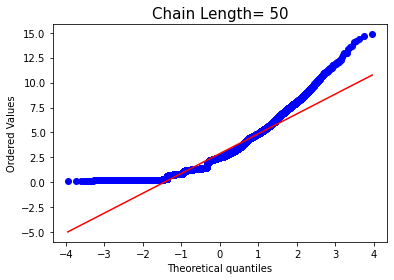

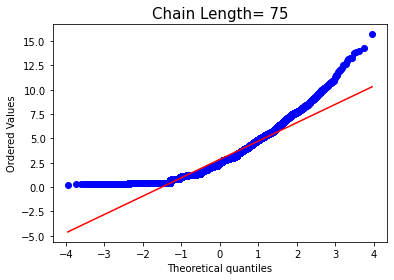

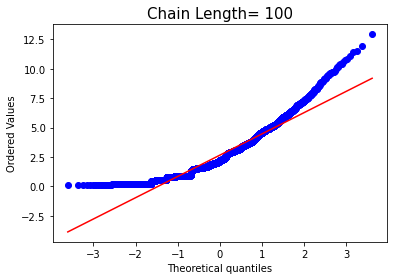

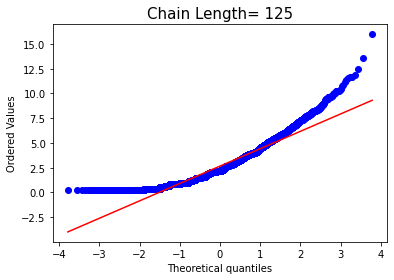

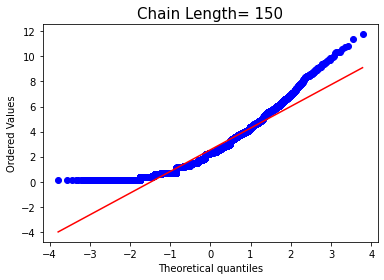

In [20]:
#Q-Q plot
#Shape Ratio
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

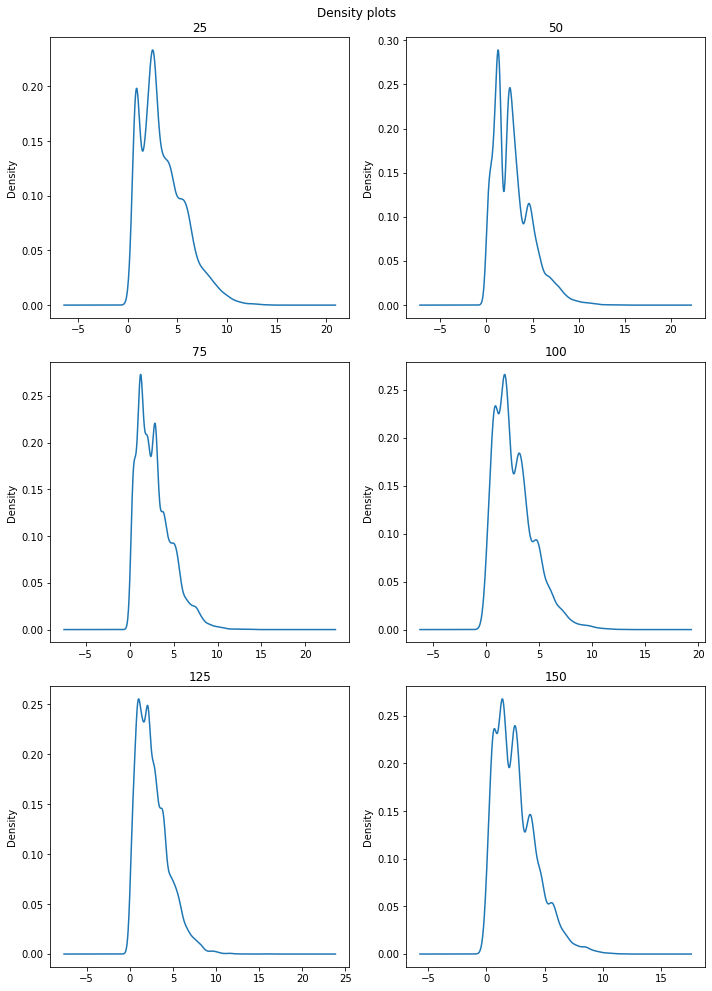

In [21]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].ratio.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

In [22]:
for i in equil_chain_rg_ree.chain_length.unique():
    print(f'{i}: {"Not Gaussian" if shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)[1]<0.05 else "Gaussian"}  {shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)}')


25: Not Gaussian  ShapiroResult(statistic=0.930227518081665, pvalue=0.0)
50: Not Gaussian  ShapiroResult(statistic=0.9163293838500977, pvalue=0.0)
75: Not Gaussian  ShapiroResult(statistic=0.9196350574493408, pvalue=0.0)
100: Not Gaussian  ShapiroResult(statistic=0.9207988381385803, pvalue=1.2751816025355835e-43)
125: Not Gaussian  ShapiroResult(statistic=0.9217650294303894, pvalue=0.0)
150: Not Gaussian  ShapiroResult(statistic=0.9270439147949219, pvalue=0.0)


/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/

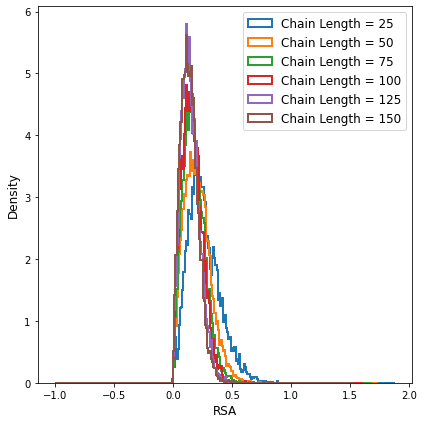

In [23]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.max()+1,0.01),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('RSA distribution',fontsize=25)
plt.xlabel("RSA",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [24]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean RSA for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.std(),'0.2f'))
    

The mean RSA for chain length  25  is 0.26 with standard deviation  0.13
The mean RSA for chain length  50  is 0.21 with standard deviation  0.11
The mean RSA for chain length  75  is 0.18 with standard deviation  0.09
The mean RSA for chain length  100  is 0.16 with standard deviation  0.08
The mean RSA for chain length  125  is 0.15 with standard deviation  0.08
The mean RSA for chain length  150  is 0.14 with standard deviation  0.07


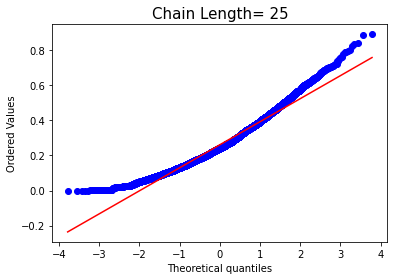

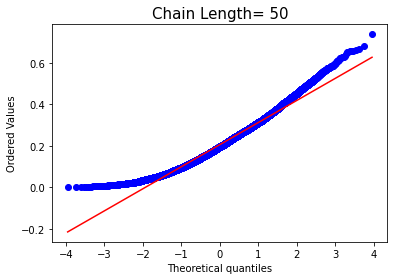

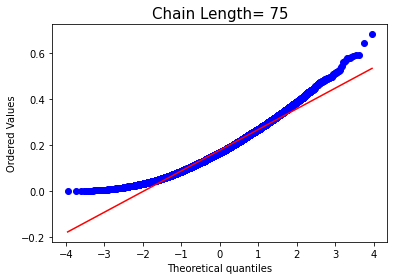

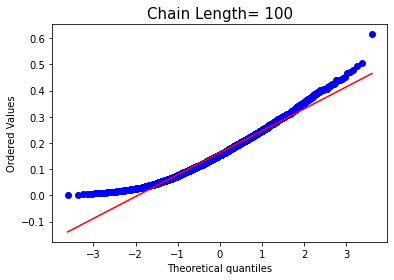

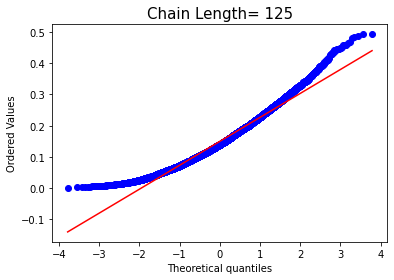

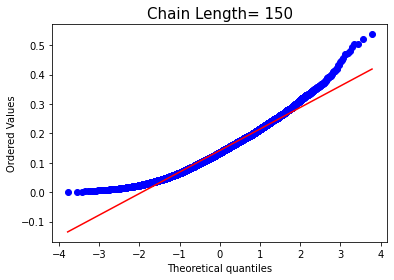

In [25]:
#Q-Q plot
#RSA
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].RSA,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

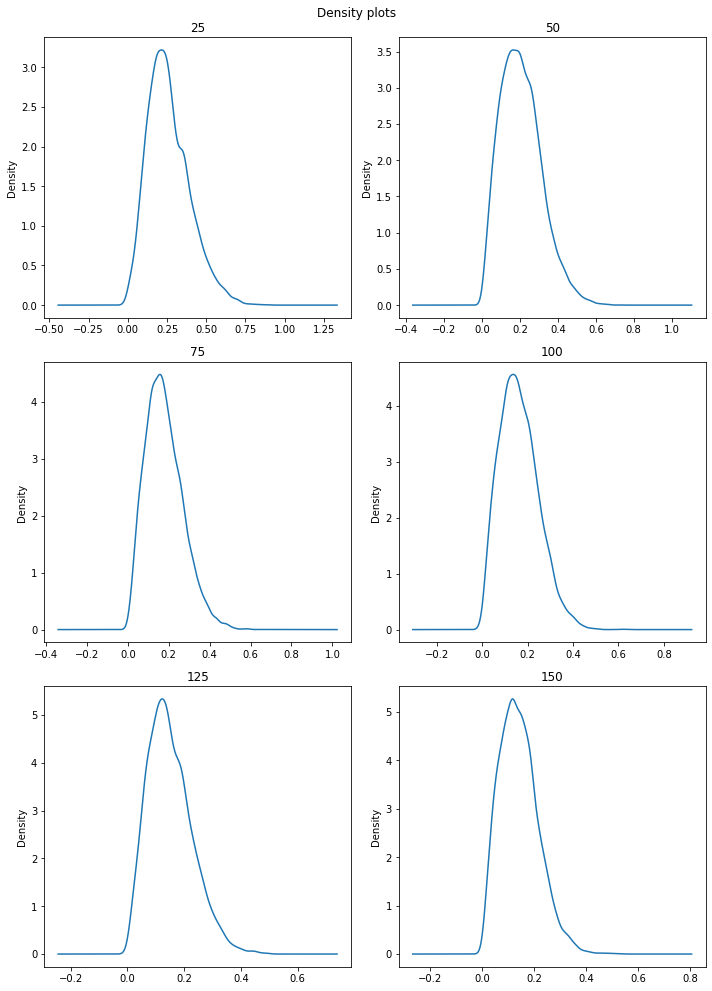

In [26]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].RSA.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

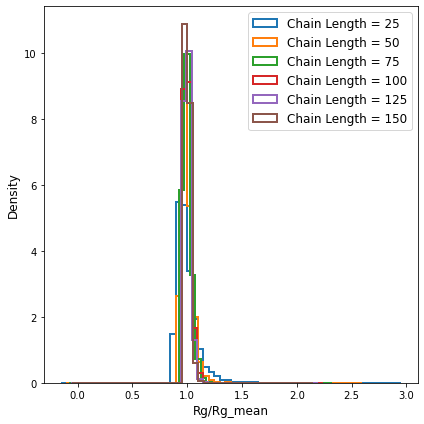

In [27]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,linewidth=2,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).min()-1,
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).max()+1,0.05))
    
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg/Rg_mean",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]


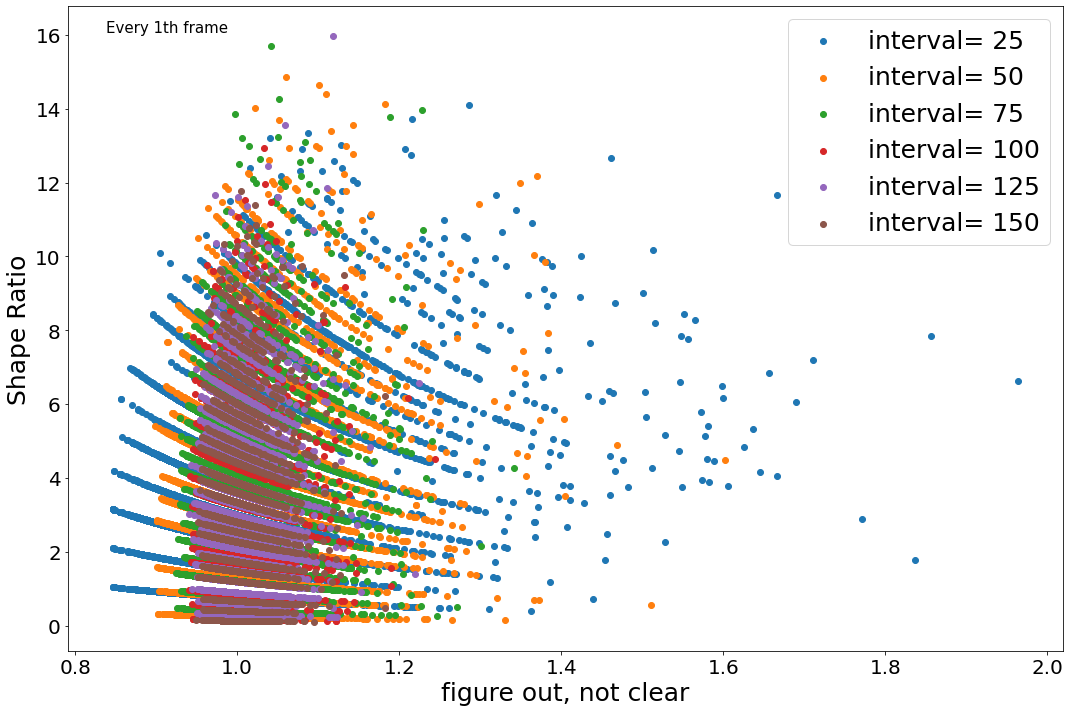

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
#    print('mean Rg/Rg_mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.std())**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('figure out, not clear',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


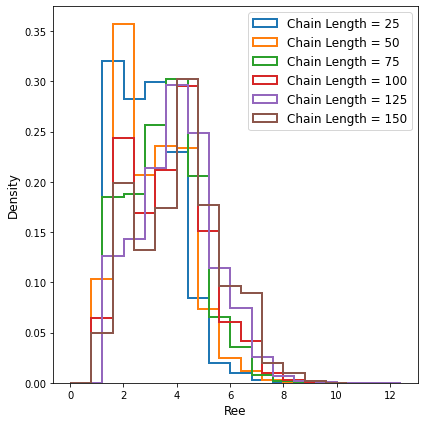

In [29]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


# dont look beyond this line

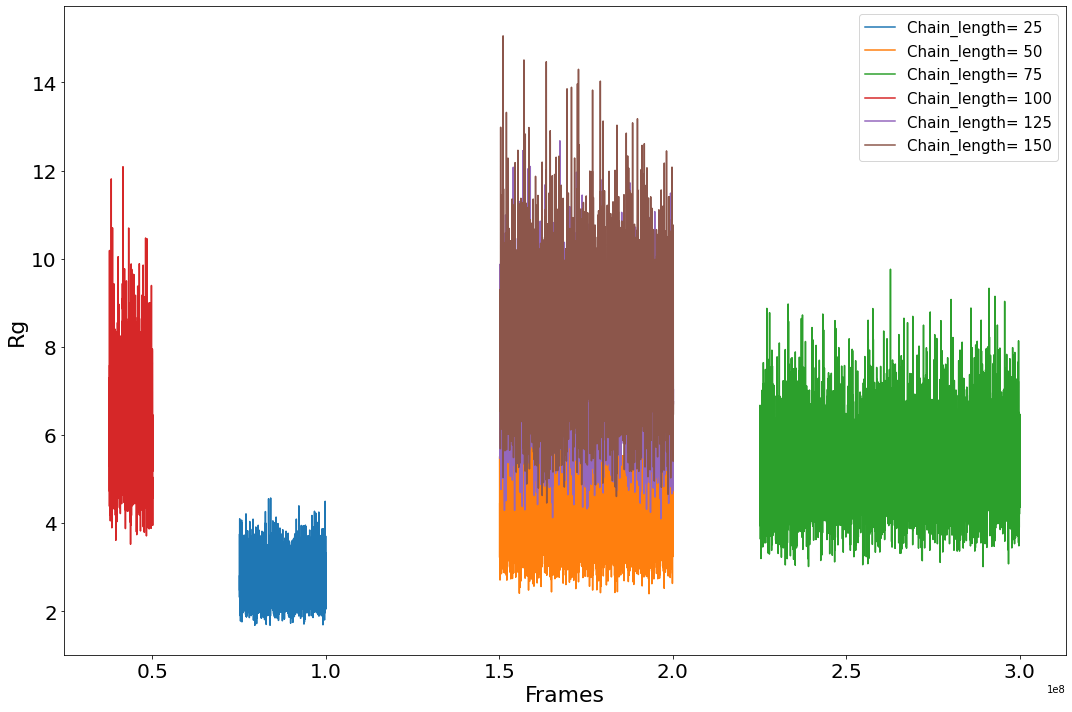

In [90]:
fig,ax = plt.subplots(figsize=(15,10))
for i in equil_chain_rg_ree.chain_length.unique():
    ax.plot(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames.values,(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values)**0.5,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rg',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

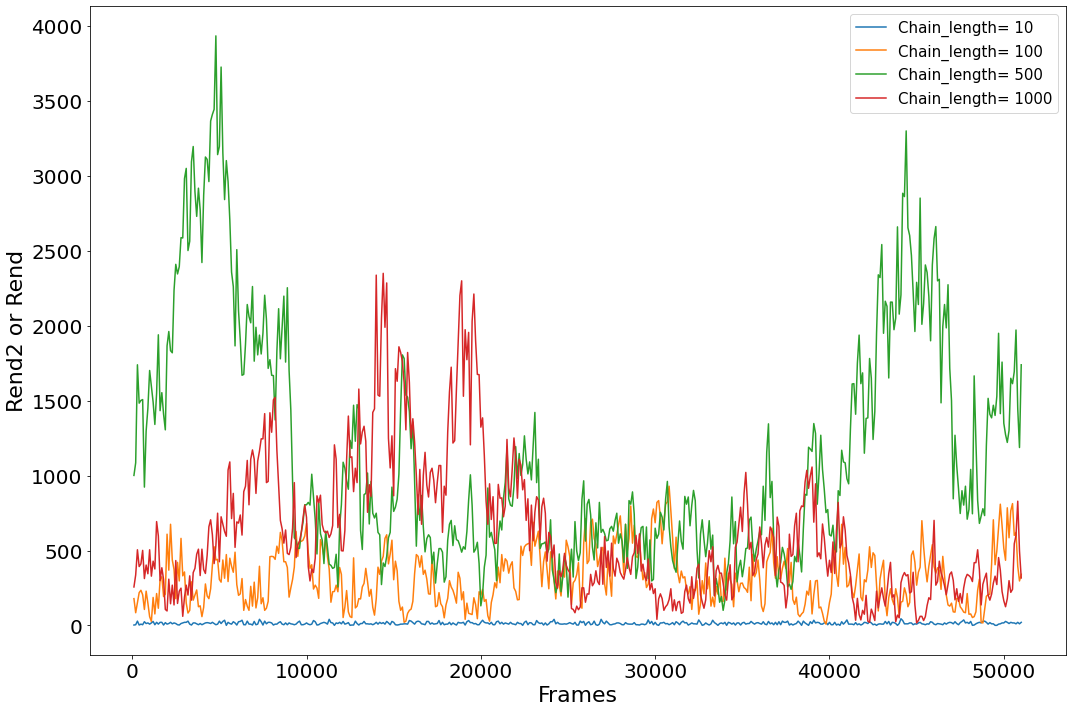

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

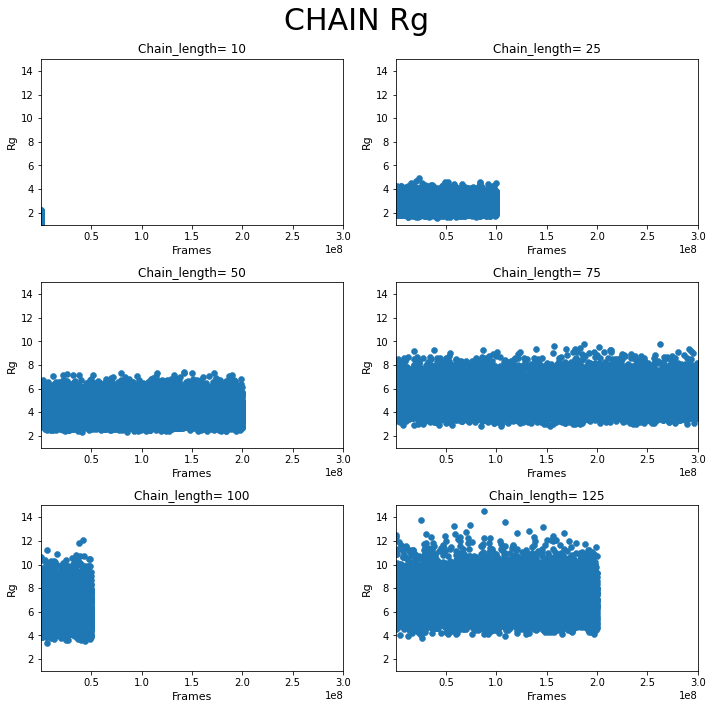

In [94]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         (chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values)**0.5,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('Chain_length= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()),int(chain_rg_ree.frames.values.max()))
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()**0.5),int(chain_rg_ree.Rg2.values.max()**0.5))
        counter+=1
fig.suptitle('CHAIN Rg',fontsize=30)
plt.tight_layout()


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


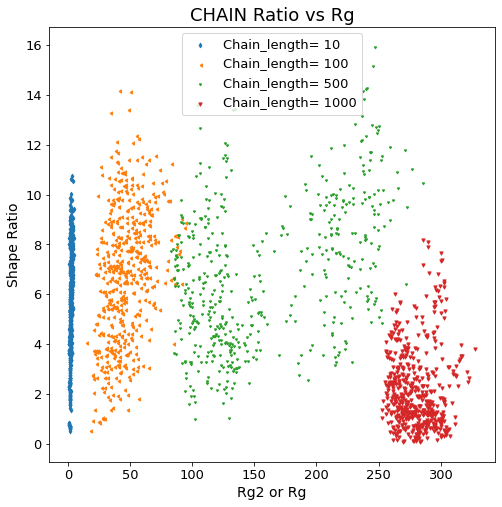

In [21]:
#IGNORE
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,ax = plt.subplots(figsize=(8,8))
temp_chain= chain_rg_ree.copy()
scatter_markers=['d',4,'1','v']
j=0
for chain_length in temp_chain.chain_length.unique():
    ax.scatter(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
               chain_rg_ree[chain_rg_ree.chain_length==chain_length].ratio.values,
               marker=scatter_markers[j],s=10,alpha=1,
                                      label='Chain_length= '+str(chain_length))
    j+=1
ax.set_xlabel('Rg2 or Rg',fontsize=14)
ax.set_ylabel('Shape Ratio',fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.setp(ax.get_xticklabels(), fontsize=13)
ax.legend(fontsize=13)
ax.set_title('CHAIN Ratio vs Rg',fontsize=18) #Ratio vs Rg
del temp_chain